# Question 9 (e-g) 

######  Hadar Mentel 205642366 
###### Linoy Halifa 201052198
###### Noam Arian 311271829

In [ ]:
#(e)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression



In [ ]:
#(a)

# Import necessary libraries

# Read the dataset from a CSV file (replace 'College.csv' with the actual file path)
data = pd.read_csv('College.csv')

# Remove unnecessary column (if exists)
data = data.drop(columns=['Unnamed: 0'])

# Convert the 'Private' column to numerical values (Yes=1, No=0)
data['Private'] = data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into predictors (X) and the target variable (y)
X = data.drop(columns=['Apps'])  # All columns except 'Apps'
y = data['Apps']  # Target variable (number of applications)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the sizes of the training and test sets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])



In [ ]:
#(b)

# Fit a linear regression model using least squares on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate the test error (Mean Squared Error)
test_error = mean_squared_error(y_test, y_pred)

# Print the test error
print(f"Test Error (Mean Squared Error): {test_error:.4f}")

In [ ]:
#(e)

# Perform PCA on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform cross-validation to select the optimal number of components (M)
mse_scores = []
for m in range(1, X_train_pca.shape[1] + 1):
    # Use only the first m principal components
    X_train_reduced = X_train_pca[:, :m]
    
    # Fit a linear regression model on the reduced training data
    model = LinearRegression()
    
    # Calculate the negative MSE using cross-validation
    scores = cross_val_score(model, X_train_reduced, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Append the mean MSE for the current number of components
    mse_scores.append(-np.mean(scores))

# Find the optimal number of components (M) with the lowest MSE
optimal_m = np.argmin(mse_scores) + 1
print(f"Optimal number of components (M): {optimal_m}")

# Use the optimal number of components to transform the data
X_train_reduced = X_train_pca[:, :optimal_m]
X_test_reduced = X_test_pca[:, :optimal_m]

# Fit a linear regression model on the reduced training data
pcr_model = LinearRegression()
pcr_model.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred = pcr_model.predict(X_test_reduced)

# Calculate the test error (Mean Squared Error)
pcr_test_error = mean_squared_error(y_test, y_pred)
print(f"PCR Test Error (Mean Squared Error): {pcr_test_error:.4f}")

In [ ]:
print(X.shape)  # Prints the number of rows and columns in X
print(X.columns)  # Prints the names of all columns in X


In [ ]:
#(f)

# Initialize variables to store MSE scores for each number of components
mse_scores = []

# Loop through possible values of M (number of components)
for m in range(1, X_train.shape[1] + 1):  # Number of components ranges from 1 to number of predictors
    # Fit PLS model with m components
    pls_model = PLSRegression(n_components=m)
    
    # Perform cross-validation to calculate the negative mean squared error
    scores = cross_val_score(pls_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Append the mean MSE for the current number of components
    mse_scores.append(-np.mean(scores))

# Select the optimal number of components (M) that minimizes the MSE
optimal_m = np.argmin(mse_scores) + 1
print(f"Optimal number of components (M): {optimal_m}")

# Fit PLS model with the optimal number of components
pls_model = PLSRegression(n_components=optimal_m)
pls_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pls_model.predict(X_test)

# Calculate the test error (Mean Squared Error)
pls_test_error = mean_squared_error(y_test, y_pred)
print(f"PLS Test Error (Mean Squared Error): {pls_test_error:.4f}")

#(g)

Test Error (Mean Squared Error) for Ridge Regression: 1926685.7066
Test Error (Mean Squared Error) for Lasso Regression: 1930653.7391 , Number of non-zero coefficients: 17
PCR Test Error (Mean Squared Error): 1931803.1942 , M=17
PLS Test Error (Mean Squared Error): 1931803.1942 ,M=17
Test Error (Mean Squared Error) for linear regression: 1931803.1942

we can see that the best model is Ridge Regression because the MSE of test error is the smallest on this approach. 

# question 10


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#(b)

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate the predictor matrix X
n = 1000  # Number of observations
p = 20    # Number of features
X = np.random.normal(size=(n, p))

# Step 2: Generate the coefficient vector beta with some zeros
beta = np.array([1, 2, 0, 0, 5, 0, 0, 0, 9, 0, 0, 0, 13, 0, 0, 0, 17, 0, 0, 0])

# Step 3: Generate noise vector epsilon
epsilon = np.random.normal(scale=1, size=n)  # Noise with standard deviation = 1

# Step 4: Compute the response vector Y
Y = X @ beta + epsilon

# Create a DataFrame to hold the data
data = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(p)])
data["Y"] = Y

# Display the first few rows
print("Simulated Data:")
print(data.head())


In [ ]:
#(b)

# Manually split the data
X_train = X[:100, :]  # First 100 rows for training
Y_train = Y[:100]     # Corresponding first 100 responses

X_test = X[100:, :]   # Remaining 900 rows for testing
Y_test = Y[100:]      # Corresponding remaining responses

# Display the sizes of the training and test sets
print(f"Training set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")


In [ ]:
#(c)

import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Best Subset Selection Function
def best_subset_selection(X_train, Y_train):
    p = X_train.shape[1]  # Number of predictors
    n = X_train.shape[0]  # Number of observations

    # Initialize variables to store results
    best_models = []
    training_mse = []

    # Loop over all subset sizes (1 to p predictors)
    for k in range(1, p + 1):
        best_mse = float("inf")
        best_model = None

        # Generate all combinations of k predictors
        for subset in combinations(range(p), k):
            subset_indices = list(subset)

            # Fit the model using the current subset of predictors
            X_subset = X_train[:, subset_indices]
            model = LinearRegression().fit(X_subset, Y_train)

            # Predict on the training set
            Y_pred = model.predict(X_subset)

            # Calculate MSE
            mse = mean_squared_error(Y_train, Y_pred)

            # Store the best model for this subset size
            if mse < best_mse:
                best_mse = mse
                best_model = subset_indices

        # Store the results for this subset size
        best_models.append(best_model)
        training_mse.append(best_mse)

    return best_models, training_mse

# Perform Best Subset Selection on Training Set
best_models, training_mse = best_subset_selection(X_train, Y_train)

# Plot Training Set MSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_mse) + 1), training_mse, marker='o')
plt.title("Training Set MSE vs. Model Size")
plt.xlabel("Number of Predictors")
plt.ylabel("Training Set MSE")
plt.grid()
plt.show()

# Display the best models and their MSEs
for i, (model, mse) in enumerate(zip(best_models, training_mse), 1):
    print(f"Best {i}-predictor model: Predictors {model}, Training MSE: {mse:.4f}")


In [ ]:
#(d)

# Function to calculate Test Set MSE
def calculate_test_mse(X_train, Y_train, X_test, Y_test, best_models):
    test_mse = []

    for subset_indices in best_models:
        # Fit the model using the training data and current subset of predictors
        X_subset_train = X_train[:, subset_indices]
        X_subset_test = X_test[:, subset_indices]

        model = LinearRegression().fit(X_subset_train, Y_train)

        # Predict on the test set
        Y_pred_test = model.predict(X_subset_test)

        # Calculate MSE on the test set
        mse = mean_squared_error(Y_test, Y_pred_test)
        test_mse.append(mse)

    return test_mse

# Calculate Test Set MSE for Best Subset Models
test_mse = calculate_test_mse(X_train, Y_train, X_test, Y_test, best_models)

# Plot Test Set MSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(test_mse) + 1), test_mse, marker='o', color='orange')
plt.title("Test Set MSE vs. Model Size")
plt.xlabel("Number of Predictors")
plt.ylabel("Test Set MSE")
plt.grid()
plt.show()

# Display the test MSEs for each model size
for i, mse in enumerate(test_mse, 1):
    print(f"Best {i}-predictor model Test MSE: {mse:.4f}")


In [ ]:
#(e)

# Find the model size with the minimum test MSE
min_mse = min(test_mse)
optimal_model_size = test_mse.index(min_mse) + 1  # +1 because index starts at 0

print(f"The minimum Test Set MSE is {min_mse:.4f}, achieved by the model with {optimal_model_size} predictors.")

# Comment on the results
if optimal_model_size == 1:
    print("The minimum test MSE is achieved by a model with only the intercept. This may indicate that most predictors are irrelevant.")
elif optimal_model_size == len(best_models):
    print("The minimum test MSE is achieved by a model containing all features. This suggests that all predictors are relevant, or the noise is very low.")
else:
    print("The minimum test MSE is achieved by an intermediate model size, indicating that subset selection effectively balances bias and variance.")


In [ ]:
#(f)

# Extract the predictors from the best model minimizing test MSE
optimal_size = optimal_model_size  # From part (e)
best_predictors = best_models[optimal_size - 1]  # Subset for best model

# Fit the best model to the training data
X_train_best = X_train[:, best_predictors]
model_best = LinearRegression().fit(X_train_best, Y_train)

# Compare estimated coefficients to true coefficients
estimated_coefficients = model_best.coef_
true_coefficients = beta[best_predictors]

# Display results
comparison = pd.DataFrame({
    "Predictor": [f"X{i+1}" for i in best_predictors],
    "True Coefficient": true_coefficients,
    "Estimated Coefficient": estimated_coefficients
})

print("Comparison of True and Estimated Coefficients:")
print(comparison)


In [ ]:
#(g)

# Initialize a list to store squared deviations
squared_deviations = []

# Loop through each best model with r predictors
for r, subset_indices in enumerate(best_models, start=1):
    # Fit the model using the training data
    X_train_best = X_train[:, subset_indices]
    model = LinearRegression().fit(X_train_best, Y_train)

    # Calculate estimated coefficients
    estimated_coefficients = np.zeros(p)  # Initialize with zeros for all predictors
    estimated_coefficients[subset_indices] = model.coef_

    # Calculate the squared deviation
    deviation = np.sum((beta - estimated_coefficients) ** 2)
    squared_deviations.append(deviation)

# Plot the squared deviations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(squared_deviations) + 1), squared_deviations, marker='o', color='green')
plt.title("Squared Deviation vs. Number of Predictors")
plt.xlabel("Number of Predictors (r)")
plt.ylabel("Squared Deviation")
plt.grid()
plt.show()

# Display the squared deviations
for r, deviation in enumerate(squared_deviations, start=1):
    print(f"Number of Predictors: {r}, Squared Deviation: {deviation:.4f}")


# Question 11

In [1]:
# Load the dataset
import pandas as pd
data = pd.read_csv("Boston.csv")

# Display the first few rows
print(data.head())






   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


In [37]:
#a
# Best Subset Selection


import itertools
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into predictors (X) and target (y)
X = data.drop(columns=["crim"]) 
y = data["crim"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=242)

# Function for Best Subset Selection
def best_subset_selection(X, y):
    predictors = X.columns
    results = []

    for k in range(1, len(predictors) + 1):
        for subset in itertools.combinations(predictors, k):
            subset = list(subset)
            X_subset = sm.add_constant(X[subset])  # Add constant for intercept
            model = sm.OLS(y, X_subset).fit()

            # Calculate AIC and Adjusted R^2
            aic = model.aic
            adj_r2 = model.rsquared_adj

            # Store the subset, AIC, Adjusted R^2, and model
            results.append({
                "Subset": subset,
                "AIC": aic,
                "Adjusted R^2": adj_r2,
                "Model": model
            })

    return results

# Apply Best Subset Selection
results = best_subset_selection(X_train, y_train)

# Sort results by AIC and Adjusted R^2
results_sorted_aic = sorted(results, key=lambda x: x["AIC"])
results_sorted_r2 = sorted(results, key=lambda x: -x["Adjusted R^2"])  # Sort descending

# Display the top models for AIC and Adjusted R^2
print("Top models by AIC:")
for result in results_sorted_aic[:5]:
    print(f"Subset: {result['Subset']}, AIC: {result['AIC']:.2f}, Adjusted R^2: {result['Adjusted R^2']:.4f}")

print("\nTop models by Adjusted R^2:")
for result in results_sorted_r2[:5]:
    print(f"Subset: {result['Subset']}, AIC: {result['AIC']:.2f}, Adjusted R^2: {result['Adjusted R^2']:.4f}")

# Evaluate the best AIC model on test data
best_aic_model = results_sorted_aic[0]["Model"]
best_aic_predictors = results_sorted_aic[0]["Subset"]
X_test_subset = sm.add_constant(X_test[best_aic_predictors])
y_pred = best_aic_model.predict(X_test_subset)

# Calculate test MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"\nBest AIC Model Predictors: {best_aic_predictors}")
print(f"Test MSE: {test_mse:.2f}")


Top models by AIC:
Subset: ['zn', 'indus', 'rm', 'dis', 'rad', 'medv'], AIC: 2377.97, Adjusted R^2: 0.3901
Subset: ['zn', 'indus', 'dis', 'rad', 'medv'], AIC: 2378.05, Adjusted R^2: 0.3883
Subset: ['zn', 'rm', 'dis', 'rad', 'medv'], AIC: 2378.32, Adjusted R^2: 0.3878
Subset: ['zn', 'rm', 'dis', 'rad', 'tax', 'medv'], AIC: 2378.44, Adjusted R^2: 0.3893
Subset: ['zn', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'medv'], AIC: 2378.69, Adjusted R^2: 0.3905

Top models by Adjusted R^2:
Subset: ['zn', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'medv'], AIC: 2379.52, Adjusted R^2: 0.3908
Subset: ['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'medv'], AIC: 2379.62, Adjusted R^2: 0.3906
Subset: ['zn', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'medv'], AIC: 2378.69, Adjusted R^2: 0.3905
Subset: ['zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'lstat', 'medv'], AIC: 2380.70, Adjusted R^2: 0.3904
Subset: ['Unnamed: 0', 'zn', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'medv'], AIC: 2379.80, Adjusted

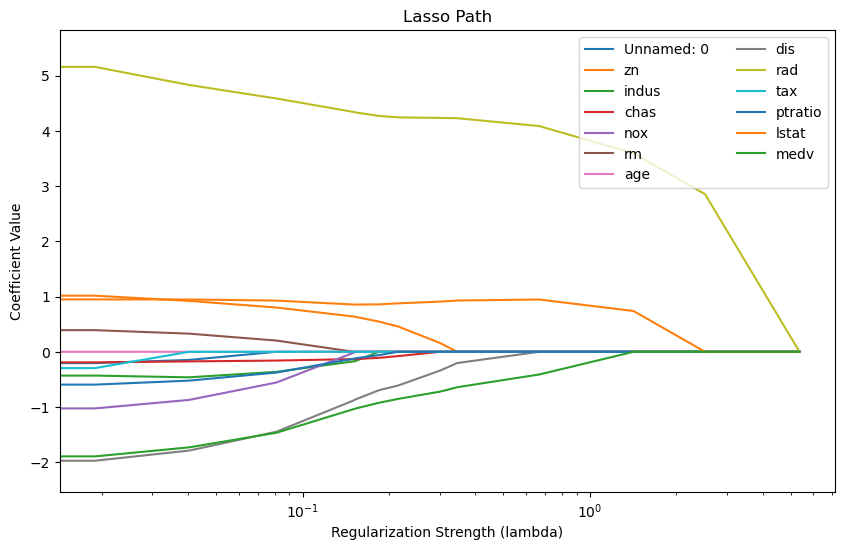

In [38]:
#Lasso:


from sklearn.linear_model import Lasso, lars_path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=["crim"]))  # All predictors except the target
y = data["crim"].values  # Ensure y is a 1D numpy array

# Step 2: Compute the Lasso path
alphas, active, coefs = lars_path(X_scaled, y, method='lasso')  # Compute the path for all alphas

# Step 3: Plot the coefficients
plt.figure(figsize=(10, 6))
for i, column in enumerate(data.drop(columns=["crim"]).columns):
    plt.plot(alphas[::-1], coefs[i, ::-1], label=column)  # Reverse alphas and coefficients for natural order

plt.xlabel("Regularization Strength (lambda)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Path")
plt.xscale("log")  # Use log scale for better visualization
plt.legend(loc='best', ncol=2)
plt.show()


In [65]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = data.drop(columns=["crim"])  # All predictors except the target
y = data["crim"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test a specific lambda value
chosen_lambda = 0.3  # Replace this with your chosen value from the graph
lasso = Lasso(alpha=chosen_lambda).fit(X_train_scaled, y_train)

# Get the predictors with non-zero coefficients
selected_predictors = X.columns[lasso.coef_ != 0]
print(f"Predictors retained at lambda={chosen_lambda}: {list(selected_predictors)}")

# Calculate MSE for training and test sets
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")


Predictors retained at lambda=0.3: ['zn', 'chas', 'dis', 'rad', 'lstat', 'medv']
Train MSE: 40.26
Test MSE: 48.86
